In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams

rc('text', usetex=True)
rcParams["font.family"] = "Times New Roman"
rcParams["font.size"] = 9
rc('legend', fontsize=7)
mm = 0.1/2.54

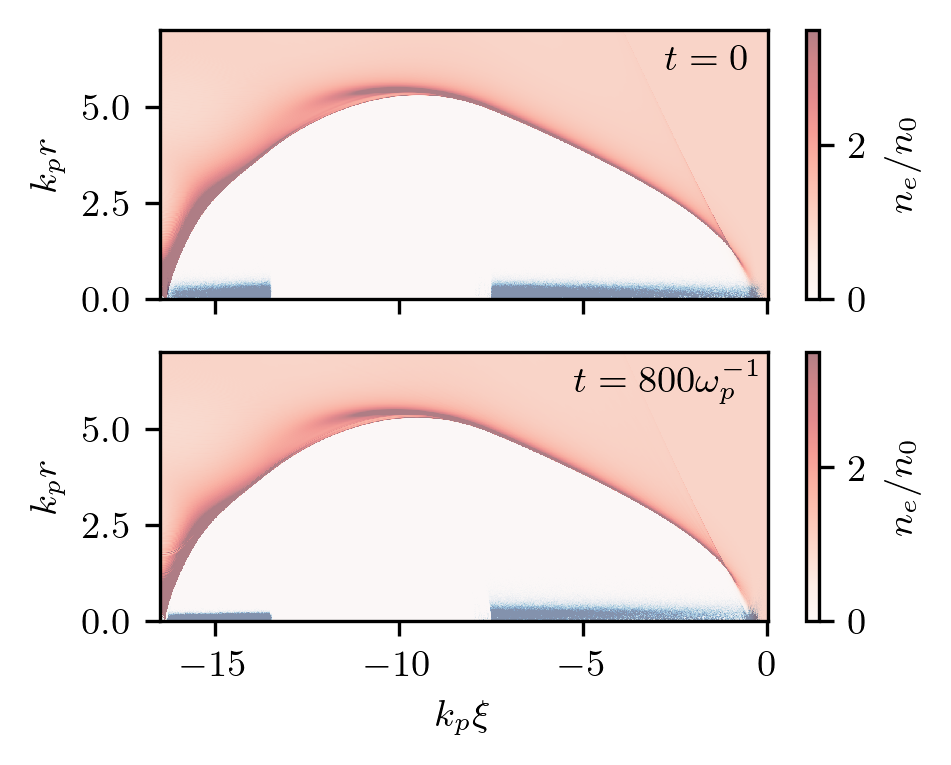

In [56]:
# Beam and plasma densities

def plot_cmap(time=5):
    data = np.load(f'./diagnostics/slice_{time:05d}.00.npz')
    xi_grid = data['xi']
    x_grid = data['x']
    ro = -(data['rho_beam'].T)
    ne = -(data['ne'].T)
    plt.pcolormesh(xi_grid, x_grid, ro, cmap='Blues', vmin=0, vmax=50, 
                   rasterized=True)
    plt.pcolormesh(xi_grid, x_grid, ne, cmap='Reds', vmin=0, vmax=3.5, 
                   rasterized=True, alpha=0.5)
    plt.colorbar(label=r'$n_e / n_0$', orientation="vertical")
    plt.ylim(0,7)
    plt.ylabel(r'$k_p r$')

fig = plt.figure(figsize=(83*mm, 65*mm), dpi=300)

plt.subplot(211)
plot_cmap(5)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.text(0.83, 0.85, r'$t=0$', transform=ax.transAxes, c='k')

plt.subplot(212)
plot_cmap(800)
plt.xlabel(r'$k_p \xi$')
ax = plt.gca()
plt.text(0.68, 0.85, r'$t= 800 \omega_p^{-1}$', transform=ax.transAxes, c='k')
plt.show()
plt.savefig('ne.png',format='png', dpi=300, bbox_inches='tight')

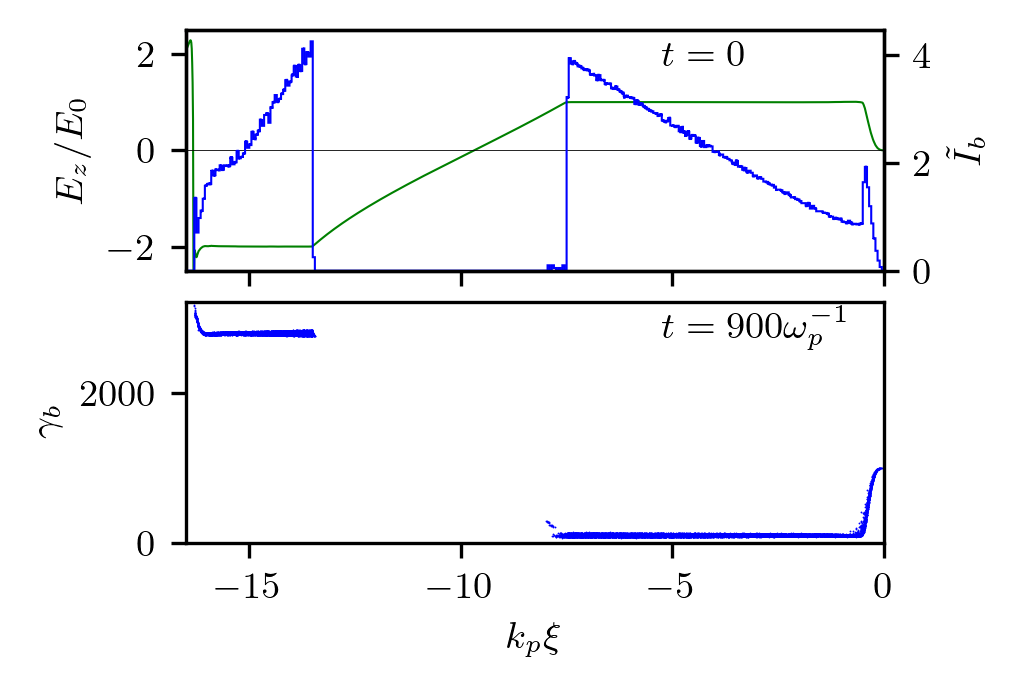

In [57]:
# Plot current profile, electric field Ez, beam energy

fig = plt.figure(figsize=(83*mm, 55*mm), dpi=300)

ax = plt.subplot(211)
fxi = np.load('./diagnostics/f_xi_00005.00.npz')
ax.plot(fxi['xi'], fxi['E_z'], lw=0.5, color='g')
ax.axhline(y=0, lw=0.2, color='k')
ax.set_ylabel(r'$E_z/E_0$')
ax.set_ylim(-2.5, 2.5)

ax2 = ax.twinx()
beam = np.load('./diagnostics/beam_00005.00.npz')
ax2.hist(beam['xi'], bins=1650, range=(-16.5, 0), histtype='step', 
         weights=5/800*np.ones_like(beam['xi']), lw=0.5, color='b')
ax2.set_ylabel(r'$\tilde I_b$')
ax2.set_xlim(-16.5, 0)

ax.text(0.68, 0.85, r'$t= 0$', transform=ax.transAxes, c='k')
ax.axes.xaxis.set_ticklabels([])

ax = plt.subplot(212)
beam = np.load('./diagnostics/beam_00900.00.npz')
ax.scatter(beam['xi'][::10], beam['pz'][::10], lw=0, s=0.2, c='b', 
            rasterized=True)
ax.set_ylabel(r'$\gamma_b$')
ax.set_ylim(0,3200)
ax.set_xlim(-16.5, 0)
ax.set_xlabel(r'$k_p \xi$')
ax.text(0.68, 0.85, r'$t= 900 \omega_p^{-1}$', transform=ax.transAxes, c='k')

plt.tight_layout(pad=0.3)
plt.savefig('Ez.png', format='png', dpi=300, bbox_inches='tight')